In [6]:
import scipy.stats as stats
import numpy as np

# Generate some sample data
data = np.random.normal(0, 1, 100)

# Perform the Shapiro-Wilk test
stat, p = stats.shapiro(data)

# Print the test results
print('Test statistic:', stat)
print('p-value:', p)

# Interpret the test results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Test statistic: 0.9912105798721313
p-value: 0.7615456581115723
Sample looks Gaussian (fail to reject H0)


Outliers and normality

In [11]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

# create a random dataset
data = np.random.normal(size=100)

# test for normality using Shapiro-Wilk test
stat, p = stats.shapiro(data)
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)
if p > 0.05:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

# identify outliers using z-score
z = np.abs(stats.zscore(data))
threshold = 3
outliers = np.where(z > threshold)
print('Indices of outliers:', outliers[0])

# test for normality using D’Agostino’s K^2 Test
stat, p = stats.normaltest(data)
print('D’Agostino’s K^2 Test statistic:', stat)
print('p-value:', p)
if p > 0.05:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

# identify outliers using OLS regression
model = sm.OLS(data, np.arange(len(data))).fit()
resid = model.resid
outliers = np.where(np.abs(resid) > 2 * np.std(resid))
print('Indices of outliers:', outliers[0])


Shapiro-Wilk test statistic: 0.964271605014801
p-value: 0.008203013800084591
Data does not look Gaussian (reject H0)
Indices of outliers: [77]
D’Agostino’s K^2 Test statistic: 9.51468020828819
p-value: 0.008588423354361606
Data does not look Gaussian (reject H0)
Indices of outliers: [28 29 48 54 77 94]


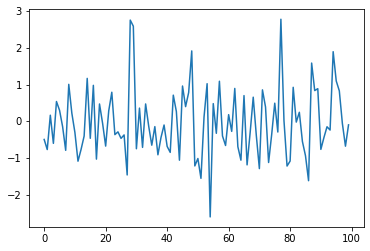

In [10]:
import matplotlib.pyplot as plt
plt.plot(data)

# Stationary test 

In [9]:
import pandas as pd
import statsmodels.api as sm

# # read data from a CSV file
# data = pd.read_csv('data.csv', index_col=0)
# create a random dataset
data = np.random.normal(size=100)
# perform ADF test
# result = sm.tsa.stattools.adfuller(data['value'])
result = sm.tsa.stattools.adfuller(data)
# print test statistics and p-values
print('ADF test statistic:', result[0])
print('p-value:', result[1])
print('Critical values:', result[4])
if result[0] < result[4]['5%']:
    print('Data is stationary')
else:
    print('Data is non-stationary')


ADF test statistic: -4.302368259922212
p-value: 0.000440036255749468
Critical values: {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}
Data is stationary


Benford's law

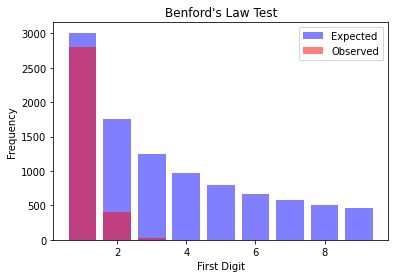

Chi-square statistic: 6231.2462932712715
p-value: 0.0
The data does not follow Benford's Law


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # read data from a CSV file
# # data = pd.read_csv('data.csv')

# # get the first digit of each value
# first_digits = data.apply(lambda x: int(str(x)[0]))
# numpy array case 
def first_digit(data):
  dta=[]
  for dt in data:
    dta.append(int(str(abs(dt))[0]))
  return dta
first_digits= first_digit(data)

# calculate the expected frequencies according to Benford's Law
expected = np.log10(1 + 1 / np.arange(1, 10)) * len(data)

# calculate the observed frequencies
observed = np.histogram(first_digits, bins=np.arange(1, 11))[0]

# plot the expected and observed frequencies
fig, ax = plt.subplots()
ax.bar(np.arange(1, 10), expected, color='blue', alpha=0.5, label='Expected')
ax.bar(np.arange(1, 10), observed, color='red', alpha=0.5, label='Observed')
ax.legend()
ax.set_xlabel('First Digit')
ax.set_ylabel('Frequency')
ax.set_title('Benford\'s Law Test')
plt.show()

# calculate the chi-square goodness of fit test statistic
chisq_stat = np.sum((observed - expected)**2 / expected)
print('Chi-square statistic:', chisq_stat)

# calculate the p-value for the chi-square test
from scipy.stats import chi2
df = 8  # degrees of freedom
p_value = 1 - chi2.cdf(chisq_stat, df)
print('p-value:', p_value)
if p_value < 0.05:
    print('The data does not follow Benford\'s Law')
else:
    print('The data follows Benford\'s Law')


In [15]:
np.log10(1 + 1 / np.arange(1, 10)) * len(data)

array([30.10299957, 17.60912591, 12.49387366,  9.6910013 ,  7.9181246 ,
        6.69467896,  5.7991947 ,  5.11525224,  4.57574906])

In [24]:
int(str(abs(data[0]))[0])

0

Outlier handeling 

In [41]:
# Z-score method removing outlier
import numpy as np

# generate some random data
data = np.random.normal(0, 1, 10000)

# calculate the Z-score for each data point
z_scores = (data - np.mean(data)) / np.std(data)

# set a threshold for the Z-score
threshold = 3   # normally 3sigma

# remove outliers
data_clean = data[np.abs(z_scores) < threshold]
print(len(data_clean), len(data))


9975 10000


In [42]:
# IQR method: The IQR (interquartile range) method is another commonly used method to remove outlier
import numpy as np

# calculate the IQR for the data
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# set a range for the data
lower_range = q1 - 1.5 * iqr    #usually 1.5 times the IQR
upper_range = q3 + 1.5 * iqr

# remove outliers
data_clean = data[(data >= lower_range) & (data <= upper_range)]
print(len(data_clean), len(data))

9935 10000


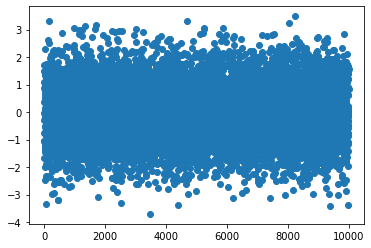

In [43]:
# Visual inspection
import numpy as np
import matplotlib.pyplot as plt
# plot the data
fig, ax = plt.subplots()
ax.scatter(range(len(data)), data)

# identify and remove outliers
outliers = [10, 20, 30]  # indices of the outliers
data_clean = np.delete(data, outliers)


In [ ]:
print(len(data_clean), len(data))

Scheffe test

Scheffé's test results:
Null hypothesis: The means of all groups are equal
Alternative hypothesis: At least one group mean is different
F = 2.3004, p-value = 0.1427
Critical value = 0.3725
Confidence interval bounds:
[[ 0.          2.33573574  3.13573574]
 [-0.46426426  0.          0.33573574]
 [-0.46426426 -0.46426426  0.        ]]


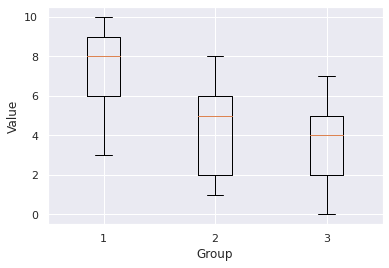

In [97]:
import numpy as np
from scipy.stats import f, t, norm
import seaborn as sns
sns.set()

# Define the data
group1 = [3, 6, 8, 9, 10]
group2 = [1, 2, 5, 6, 8]
group3 = [0, 2, 4, 5, 7]
data = np.concatenate([group1, group2, group3])


# Calculate the group means and standard deviations
group_means = [np.mean(group1), np.mean(group2), np.mean(group3)]
group_stdevs = [np.std(group1, ddof=1), np.std(group2, ddof=1), np.std(group3, ddof=1)]

# Calculate the total number of observations and the number of groups
N = len(data)
k = len(group_means)

# Calculate the overall mean and variance
overall_mean = np.mean(data)
overall_var = np.sum((data - overall_mean) ** 2) / (N - 1)

# Calculate the F-statistic and p-value for the ANOVA test
SSB = np.sum((group_means - overall_mean) ** 2) * len(group1)
SSE = np.sum([(np.array(group) - group_mean) ** 2 for group, group_mean in zip([group1, group2, group3], group_means)])
MSW = SSE / (N - k)
F = (SSB / (k - 1)) / MSW
p_value = 1 - f.cdf(F, k - 1, N - k)

# Calculate the critical value for the Scheffé test
alpha = 0.05
dfn = k - 1
dfd = N - k
q = np.sqrt((k * (k - 1) * f.ppf(1 - alpha, dfn, dfd)) / (dfd * (N - 1)))

# Calculate the lower and upper bounds of the confidence intervals
CI_bounds = q * np.sqrt(MSW) * np.sqrt(1 / len(group1)) * np.ones((k, k))
for i in range(k):
    for j in range(k):
        if i == j:
            CI_bounds[i, j] = 0
        elif i < j:
            CI_bounds[i, j] = group_means[i] - group_means[j] - CI_bounds[i, j]
        else:
            CI_bounds[i, j] = group_means[i] - group_means[j] + CI_bounds[j, i]

# Print the results
print("Scheffé's test results:")
print("Null hypothesis: The means of all groups are equal")
print("Alternative hypothesis: At least one group mean is different")
print("F = {:.4f}, p-value = {:.4f}".format(F, p_value))
print("Critical value = {:.4f}".format(q))
print("Confidence interval bounds:")
print(CI_bounds)
df=pd.DataFrame([group1,group2,group3]).T
plt.boxplot(df)
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()